In [1]:
# Importing the necessay libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, ActivityRegularization, Reshape
from tensorflow.keras.optimizers import SGD

In [2]:
# loading the data
train = pd.read_csv("D:\\New folder\\ML\\Completed\\mnist_train.csv")
test = pd.read_csv("D:\\New folder\\ML\\Completed\\mnist_test.csv")

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [5]:
def check_null_values(df):
    if df.isnull().values.any():
        print("Null value found")
    else:
        print("No null values")

In [6]:
# Checking for null values in the training set
check_null_values(train)

No null values


In [7]:
# Checking for null values in the testing set
check_null_values(test)

No null values


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [10]:
y_train = train.label
x_train = train.drop('label', axis=1) / 255

x_test = test.drop('label', axis=1) / 255
y_test = test['label']

In [11]:
x_train = x_train.values.reshape(x_train.shape[0], 28, 28)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

* In a **sparse autoencoder**, we **restrict the activations of the middle layer to be sparse by adding an L1 Penalty to the activations of the middle** layer. So, this means - that a lot of the **activations of the middle layer will be zero** - and the autoencoder will be forced to assign non-zero values only to the most important attributes of the data.

In [14]:
# Creating the encoder model
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='selu'),
    Dense(32, activation='selu'),
    ActivityRegularization(l1=1e-3)
])

* The **SELU (Scaled Exponential Linear Unit)** activation function is a **self-normalizing activation function**. It helps neural networks **maintain a mean of zero and a standard deviation of one across layers**, which can lead to improved training dynamics and performance.

When to use the SELU activation function:
* SELU is especially beneficial in deep neural networks because it helps to maintain the distribution of activations throughout the network, reducing the vanishing and exploding gradient problems that can occur with deep architectures.
* When you want your network to have self-normalizing properties. SELU activation, combined with the right initialization and normalization techniques (like LeCun Normal initialization), can ensure that the output of each layer remains standardized.
* SELU is well-suited for feedforward networks and fully connected layers.
* If you observe that your network's training is slow or unstable, using SELU might help. It can lead to faster convergence and more stable training.
* Tasks such as regression, classification, and other supervised learning problems where stable and efficient training is crucial can benefit from SELU.

* The **ActivityRegularization layer** in TensorFlow Keras is used to apply a regularization penalty on the layer's output (its "activity"). This can help to enforce constraints on the values that the neurons can take during training, which can in turn help to prevent overfitting and improve generalization.

* **Regularization on Outputs:** The ActivityRegularization layer adds a penalty based on the L1 and/or L2 norms of the output. This is different from weight regularization, which penalizes the weights of the layer.

* **Usage in Regularization:** This layer can be used when you want to apply a regularization directly to the output of a layer. For example, you might want the outputs of a certain layer to remain small or sparse.

When to use the ActivityRegularization layer:
* **Preventing Overfitting:** Adding activity regularization can help to prevent overfitting by penalizing large activations, encouraging the network to produce more modest outputs.
* **Sparse Representations:** If you want certain layers in your network to produce sparse outputs (many values close to zero), using L1 activity regularization can be beneficial.
* **Controlling Outputs:** When you need to enforce certain constraints on the outputs of a layer, activity regularization can be useful.

In [15]:
# Creating the decoder model
decoder = Sequential([
    Dense(128, activation='selu', input_shape=(32, )),
    Dense(784, activation='sigmoid'),
    Reshape([28, 28])
])

In [16]:
# Creating the full model
sparse_ae = Sequential([encoder, decoder])

In [17]:
optimizer = SGD(learning_rate=0.1)

In [18]:
# Compiling the model
sparse_ae.compile(loss='binary_crossentropy', optimizer=optimizer)

In [19]:
sparse_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32)                104608    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            105360    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = sparse_ae.fit(x_train, x_train, epochs=30, validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3347 - val_loss: 0.2799
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - val_loss: 0.2575
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2487 - val_loss: 0.2379
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2298 - val_loss: 0.2208
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2159 - val_loss: 0.2091
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2057 - val_loss: 0.1998
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1966 - val_loss: 0.1912
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1891 - val_loss: 0.1843
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1828 - val_loss: 0.1785
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.177

In [21]:
to_predict = x_test[:6]
prediction = sparse_ae.predict(to_predict)

1/1 [==============================] - 0s 105ms/step


In [22]:
def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize=(predictions.shape[0] * 5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap='Greys')
        ax.set_title(y_test[i])

    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(x_test[i], cmap='Greys')
        ax.set_title(y_test[i])
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\envs\\Research\\lib\\site-packages\\matplotlib\\pyplot.py'>

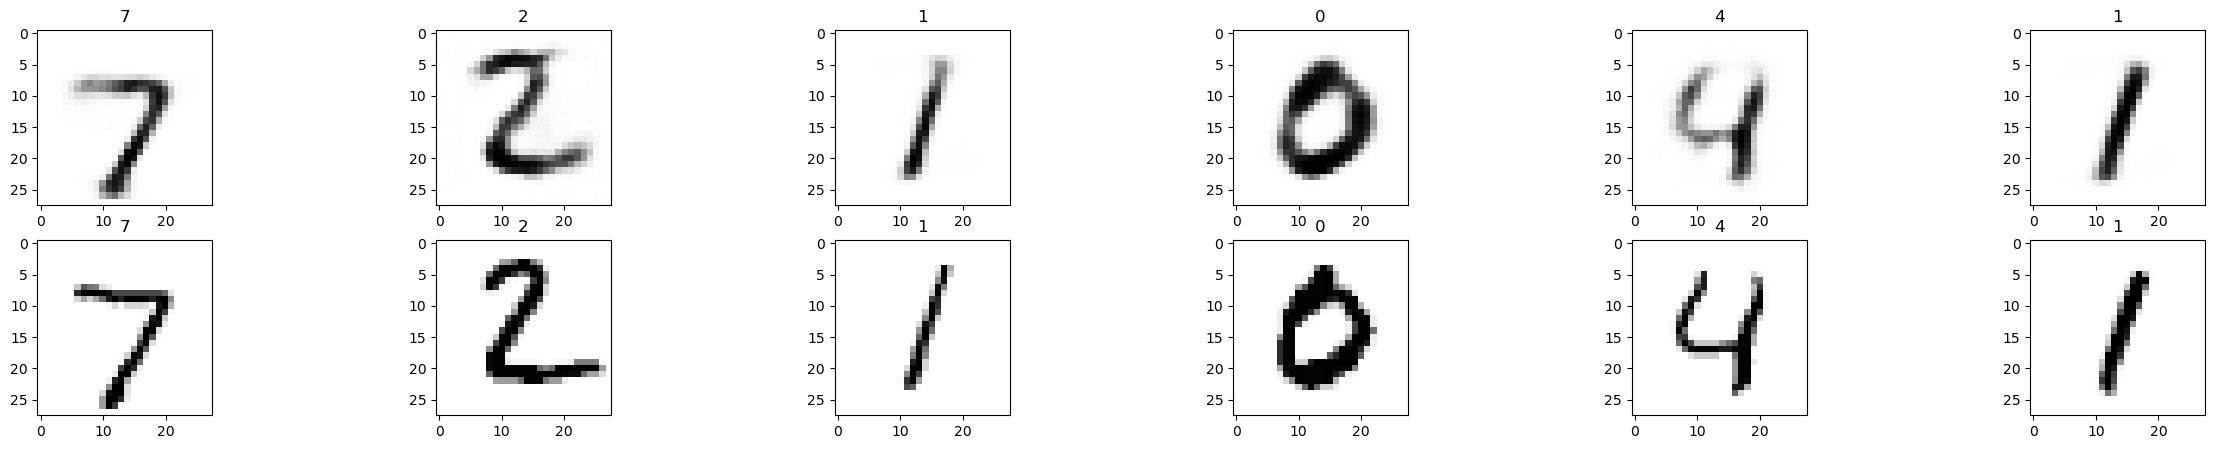

In [23]:
visualize_predictions(prediction, to_predict)